In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/saheart/SAheart.csv


In [2]:
df= pd.read_csv('/kaggle/input/saheart/SAheart.csv')

In [3]:
df.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

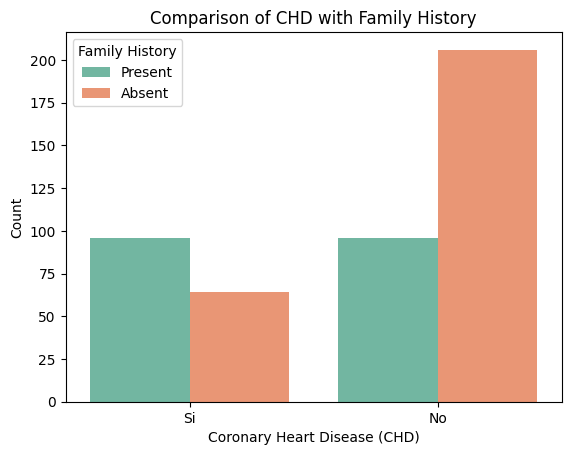

In [6]:
sns.countplot(data=df, x='chd', hue='famhist',palette='Set2')

plt.xlabel("Coronary Heart Disease (CHD)")
plt.ylabel("Count")
plt.title("Comparison of CHD with Family History")
plt.legend(title="Family History")
plt.show()

In [7]:
df['age'].corr(df['sbp'])

0.3887705972765735

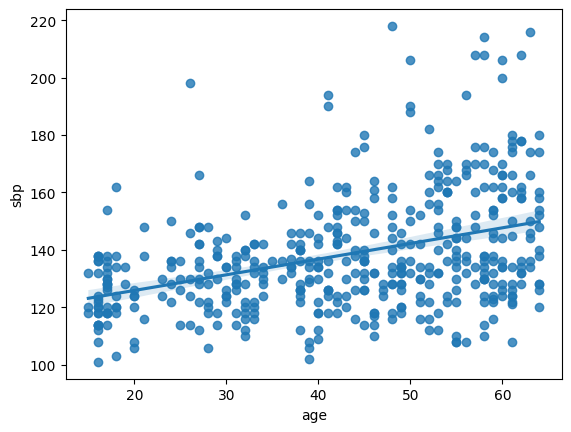

In [8]:
sns.regplot(x='age',y='sbp',data=df);

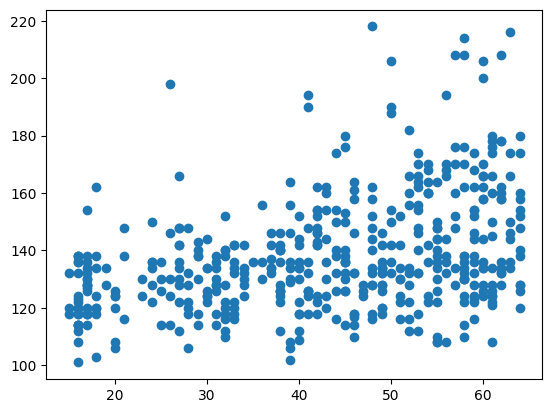

In [9]:
plt.scatter(x='age',y='sbp',data=df);

<Axes: xlabel='chd', ylabel='tobacco'>

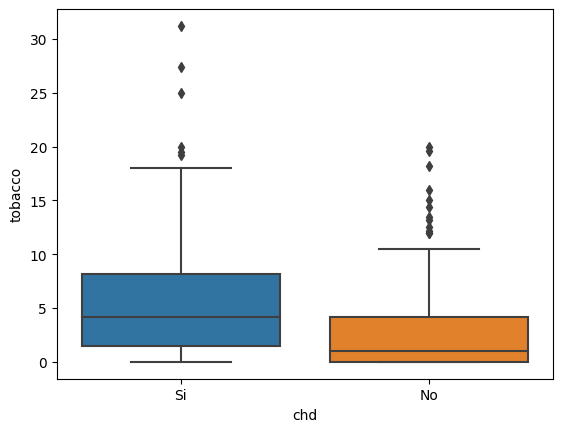

In [10]:
sns.boxplot(data=df, x='chd',y='tobacco')

In [11]:
influential_features=['sbp', 'obesity', 'ldl']


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


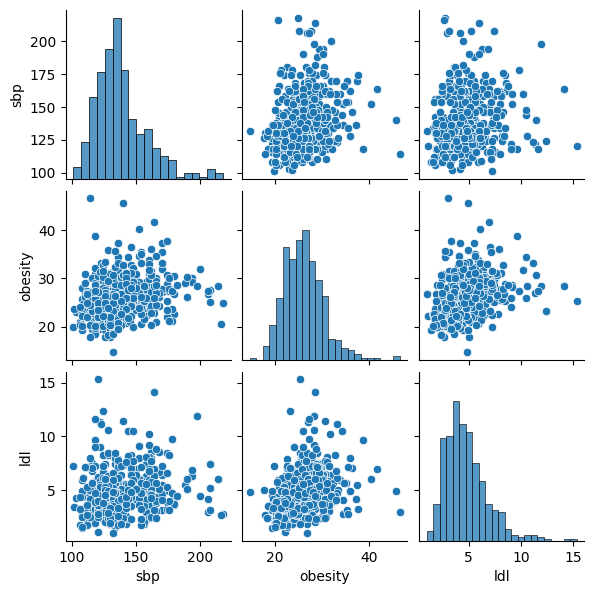

In [12]:
sns.pairplot(df[influential_features], size=2)

In [13]:
df[influential_features].corr()

,sbp,obesity,ldl
sbp,1.000000,0.238067,0.158296
obesity,0.238067,1.000000,0.330506
ldl,0.158296,0.330506,1.000000


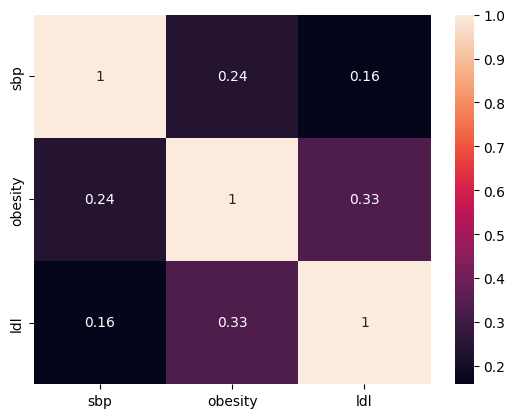

In [14]:
sns.heatmap(df[influential_features].corr(), annot=True);

In [15]:
bins = [0, 15, 35, 55, float('inf')]  # Define bin edges
labels = ['young', 'adults', 'mid', 'old']  # Define corresponding label

In [16]:
df['agegroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print(df[['age', 'agegroup']].head())

   age agegroup
0   52      mid
1   63      old
2   46      mid
3   58      old
4   49      mid


In [17]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si,mid
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si,old
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No,mid
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si,old
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si,mid


In [18]:
chd_counts = df[df['chd'] == 'Si'].groupby('agegroup').size()

/tmp/ipykernel_17/987312796.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chd_counts = df[df['chd'] == 'Si'].groupby('agegroup').size()


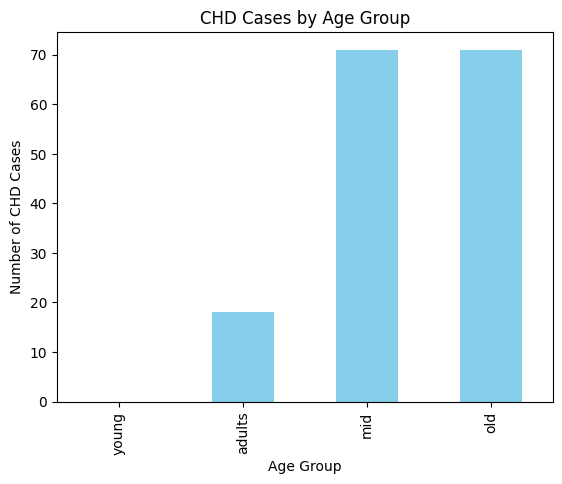

In [19]:
chd_counts.sort_index().plot(kind='bar', color='skyblue')
plt.xlabel("Age Group")
plt.ylabel("Number of CHD Cases")
plt.title("CHD Cases by Age Group")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


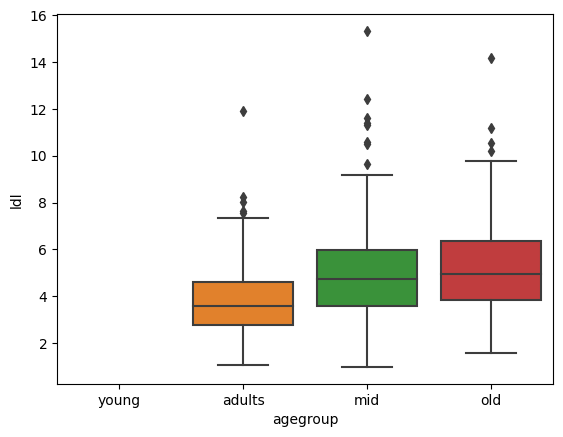

In [20]:
sns.boxplot(data=df,x='agegroup',y='ldl');